# ESERCIZIO SLIDES 3-10 LEZIONE 14-15 OTTOBRE

In [12]:
import numpy as np

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("C:/Users/utente/Desktop/UNIMI/Organizzazioni e società digitali/Esercizi/Person_Gender_Height_Weight_Index.csv")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [15]:
BMI = df['Weight']/(df['Height']/100)**2
BMI

0      31.708284
1      24.355421
2      32.140248
3      27.350427
4      27.476240
         ...    
495    68.000000
496    35.739603
497    68.407022
498    42.222222
499    43.770256
Length: 500, dtype: float64

In [16]:
BMI.head()

0    31.708284
1    24.355421
2    32.140248
3    27.350427
4    27.476240
dtype: float64

In [32]:
bmi_ds = pd.DataFrame(data=df, columns = ['Gender', 'Height', 'Weight'])
bmi_ds

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


### Salvare in locale con to_csv la nuova tabella

In [27]:
bmi_ds.to_csv('Es_BMI_DS.csv') #salvato in locale

### Aggiungere una nuova colonna chiamata BMI con i valori sopra indicati

In [39]:
pd.DataFrame(data=bmi_ds, columns=['Gender', 'Height', 'Weight', 'BMI'])
bmi_ds['BMI']=bmi_ds['Weight']/(bmi_ds['Height']/100)**2
bmi_ds

,Gender,Height,Weight,BMI
0,Male,174,96,31.708284
1,Male,189,87,24.355421
2,Female,185,110,32.140248
3,Female,195,104,27.350427
4,Male,149,61,27.476240
...,...,...,...,...
495,Female,150,153,68.000000
496,Female,184,121,35.739603
497,Female,141,136,68.407022
498,Male,150,95,42.222222


In [40]:
bmi_ds.to_csv('Es_BMI_DS.csv') #salvato in locale

### Fare grafico bar chart

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #per far funzionare seaborn devo andare su anaconda prompt e scrivere "pip install seaborn==0.11" e poi aprire jupyter lab senza dal prompt
import seaborn as sns;

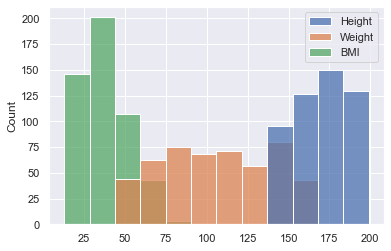

In [42]:
sns.histplot(data=bmi_ds)

In [48]:
#il grafico sopra non va benissimo perchè abbiamo dei valori che si sovrappongono e non è un grafico coerente
#l'ho messo solo per fare delle prove ma è sbagliato

## ALTRI TIPI DI GRAFICO POSSIBILI:

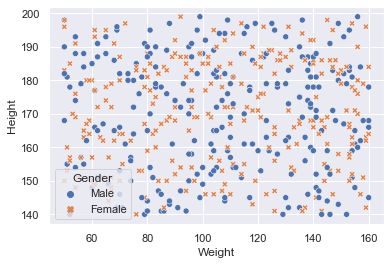

In [49]:
sns.scatterplot(data=bmi_ds, x="Weight", y="Height", hue="Gender", style="Gender") #style gender fa cambiare le figure in base a maschio o femmina
plt.show()

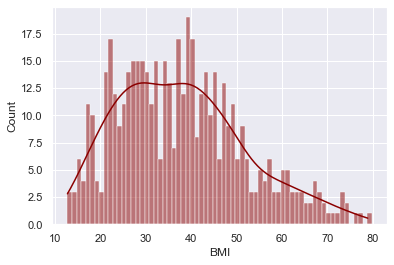

In [55]:
sns.histplot(data=bmi_ds, x="BMI", binwidth=1, stat="count", color="darkred", kde="true") #kde mi fa vedere la linea di tendenza nel grafico

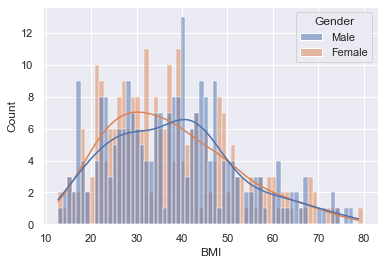

In [57]:
sns.histplot(data=bmi_ds, x="BMI", binwidth=1, stat="count", hue="Gender", kde="true", bins=300)
plt.show()

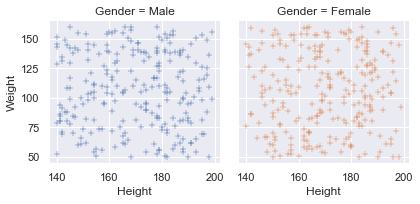

In [71]:
g = sns.FacetGrid(bmi_ds, col="Gender", hue="Gender")
g.map(sns.scatterplot, "Height", "Weight",  marker="+") #marker mette i + invece che i punti

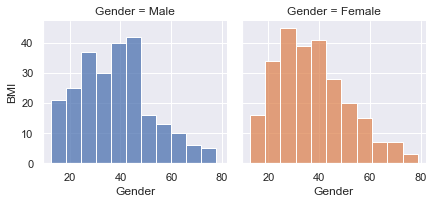

In [72]:
#chiediamo di fare dei facet con maschi e femmine, metto "col" di colonna così me le mette di fianco (con "row" li metteva una sopra l'altra)
g = sns.FacetGrid(bmi_ds, col="Gender", hue="Gender") #definisce la griglia, con col non ha senso mettere height o weight perchè hanno troppi valori 
g.map(sns.histplot, "BMI")
g.set_axis_labels("Gender", "BMI") #con la griglia indicata sopra chiediamo di farci l'istogramma
plt.show()

In [ ]:
g = sns.FacetGrid(bmi_ds, col="Gender", hue="Gender")
g.map(sns.histplot, "BMI")

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text major ticklabel objects>)

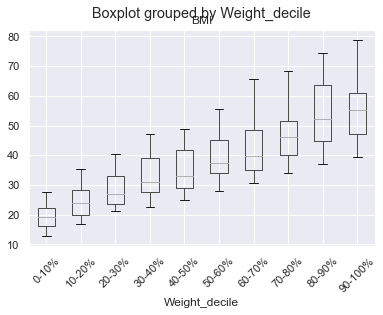

In [64]:
bmi_ds['Weight_decile'] = pd.qcut(bmi_ds['Weight'], 10, labels=['0-10%', '10-20%','20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']) #10 sta per il nr di decili ai quali assegno le etichette '0-10%' ecc.
bmi_ds.boxplot(column='BMI', by='Weight_decile')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

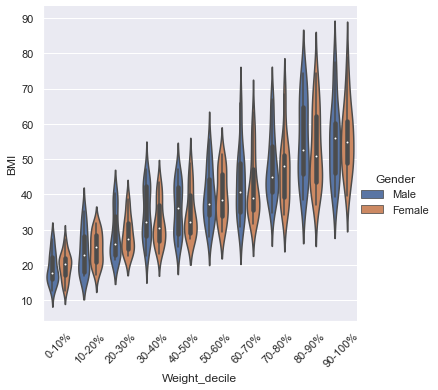

In [73]:
bmi_ds['Weight_decile'] = pd.qcut(bmi_ds['Weight'], 10, labels=['0-10%', '10-20%','20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])
sns.catplot(x="Weight_decile", y="BMI", hue="Gender", data=bmi_ds, kind="violin") #al posto di kind="violin" posso mettere "box" o "point" e vedo come cambia il grafico
plt.xticks(rotation=45)

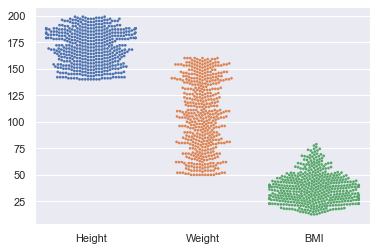

In [83]:
sns.swarmplot(data=bmi_ds, size=2.7)#se non metto size mi dice che ci sono troppi valori quindi metto size con massimo =2.7

#### Come varia il peso al variare del BMI

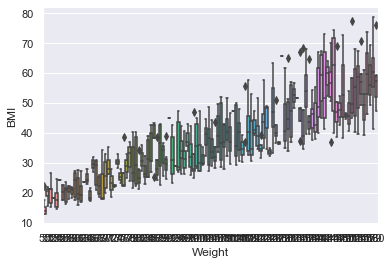

In [87]:
m=sns.boxplot(data=bmi_ds, y="BMI", x="Weight") #hue="Gender"